# This notebook contains the following

## 1. Importing libraries and data

## 2. Security implications

## 3. Comparing customer behavior in different geographic areas

3.1 Creating a new column for 'region' variable

3.2. Determining whether there’s a difference in spending habits between the different U.S. regions

## 4. Excluding low-activity customers

4.1 Creating an exclusion_flag 

4.2 Excluding the customers

## 5. Creating profiling variables

5.1 Based on age

5.2 Based on income

5.3 Based on department_id

5.4 Based on number of dependants

## 6. Visualization of the profiles

6.1 Generation distribution

6.2 Income distribution

6.3 Category distribution

6.4 Dependancy status distribution

## 7. Aggregating the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

7.1 Aggregating by generation

7.2 Aggregating by income

7.3 Aggregating by dependency status

## Step 8. Compare customer profiles with regions and departments

 8.1. Customer profiles in different regions
 
  8.1.1 Profile by region and generation
 
  8.1.2 Profile by region and income
  
  8.1.2 Profile by region and dependant status
  
  8.2 Customer profiles by department sales
  
 8.2.1 Department sales and generation
 
 8.2.2 Department sales and income
 
 8.2.3 Department sales and dependant status


## Step 9. Exporting the visalisations

This process was completed throughout the script.

## Step 10. Exporting data

## Step 11. Supplemantary Analysis

Are there certain products that are more popular than the others?

Are there differences in ordering habits based on a customers' loyalty status?

Are there differences in ordering habits based on a customer's region?

What differences can you find in ordering habits of different customer profiles?


# Step 1. Importing libraries and data

In [48]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [49]:
path = r'/Users/buketoztekin/Documents/Instacart Basket Analysis/'
file_path = os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl')
orders_products_all = pd.read_pickle(file_path)

# Step 2. Security implications

In [50]:
#The only two columns that might cause a security issue were 'first_name' and 'surname' columns which were removed in the previous stage.

# Step 3. Comparing customer behavior in different geographic areas

## Step 3.1. Creating a new column for 'region' variable

In [51]:
# Create column 'region' from from 'state' 

result = []

for value in orders_products_all["state"]:
    if value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut']:
        result.append('Northeast')
    elif value in ['New York', 'Pennsylvania', 'New Jersey']:
        result.append('Northeast')
    elif value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio']:
        result.append('Midwest')
    elif value in ['North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
        result.append('Midwest')
    elif value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida']:
        result.append('South')
    elif value in ['Kentucky', 'Tennessee', 'Mississippi', 'Alabama']:
        result.append('South')
    elif value in ['Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
        result.append('South')
    elif value in ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico']:
        result.append('West')
    elif value in ['Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']:
        result.append('West')
    else:
        result.append('Unknown')

In [52]:
# Create a 'region' column in the dataframe
orders_products_all['region'] = result

In [53]:
#Check the dataframe
orders_products_all.head()

,user_id,gender,state,age,date_joined,number_of_dependants,family_status,income,product_id,product_name,...,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spending,spender_flag,purchase_frequency,frequency_flag,region
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest


In [54]:
print(orders_products_all.columns)

Index(['user_id', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependants', 'family_status', 'income', 'product_id',
       'product_name', 'aisle_id', 'department_id', 'prices', 'order_id',
       'order_number', 'order_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered', '_merge',
       'merge_indicator', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_spending', 'spender_flag', 'purchase_frequency',
       'frequency_flag', 'region'],
      dtype='object')


## Step 3.2. Determining whether there’s a difference in spending habits between the different U.S. regions

In [55]:
# Create a crosstab to compare regions with spender flags
region_spender_crosstab = pd.crosstab(orders_products_all['region'], orders_products_all['spender_flag'],dropna = False)

In [56]:
# Display the crosstab
print(region_spender_crosstab)

spender_flag  High spender  Low spender
region                                 
Midwest             155975      7441350
Northeast           108225      5614511
South               209691     10582194
West                160354      8132559


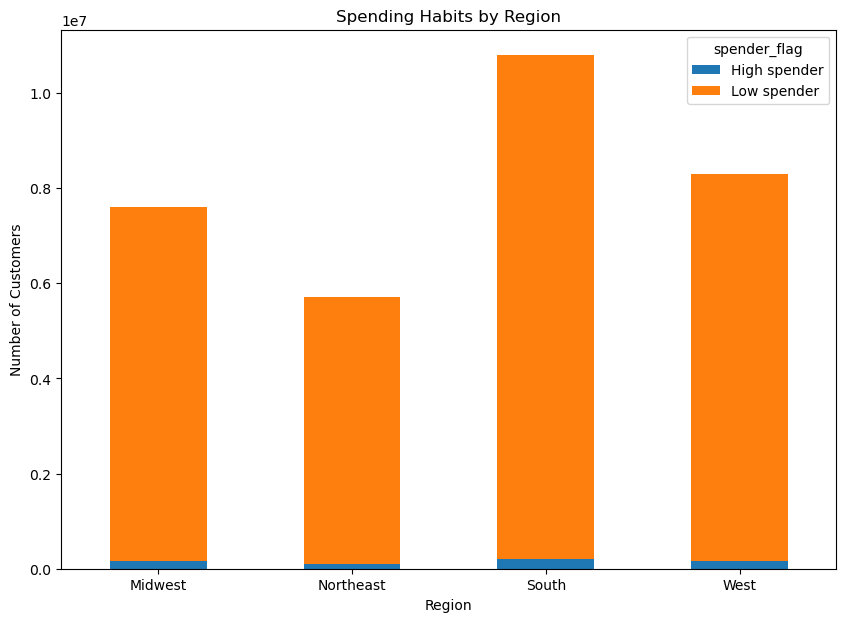

In [57]:
# Plotting the crosstab
region_spender_crosstab.plot(kind='bar', stacked=True, figsize=(10, 7))

# Adding labels and title
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.title('Spending Habits by Region')

# Set the x-axis labels to be horizontal
plt.xticks(rotation=0)

#Save the plot
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10', 'spending_habits_by_region.png'), bbox_inches = 'tight')

# Display the plot
plt.show()

In all the regions, the number of high spenders is very low compared to the low spenders. In total, South has the highest number of customers followed by West, Midwest, and Northeast.

# Step 4. Excluding low-activity customers

## Step 4.1 Creating an exclusion_flag 

In [58]:
# Create and exlusion flag for customers where max_order is less than 5 
orders_products_all.loc[orders_products_all['max_order'] < 5, 'exclusion_flag'] = 'Exclude'

In [59]:
# Create and exlusion flag for customers where max_order more than or equal to 5
orders_products_all.loc[orders_products_all['max_order'] >= 5, 'exclusion_flag'] = 'Keep'

In [60]:
#Checking the exclusion_flag column
orders_products_all.tail(30)

,user_id,gender,state,age,date_joined,number_of_dependants,family_status,income,product_id,product_name,...,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spending,spender_flag,purchase_frequency,frequency_flag,region,exclusion_flag
32404829,81095,Female,California,27,4/1/2020,1,married,99799,23313,Mac & Cheese,...,Busiest days,Average orders,3,New customer,8.273077,Low spender,22.0,Non-frequent customer,West,Exclude
32404830,81095,Female,California,27,4/1/2020,1,married,99799,26040,"Deli Fresh Honey Ham, 97% Fat Free, Gluten Free",...,Slowest days,Average orders,3,New customer,8.273077,Low spender,22.0,Non-frequent customer,West,Exclude
32404831,81095,Female,California,27,4/1/2020,1,married,99799,26040,"Deli Fresh Honey Ham, 97% Fat Free, Gluten Free",...,Busiest days,Average orders,3,New customer,8.273077,Low spender,22.0,Non-frequent customer,West,Exclude
32404832,81095,Female,California,27,4/1/2020,1,married,99799,27323,Pure & Natural Sour Cream,...,Slowest days,Average orders,3,New customer,8.273077,Low spender,22.0,Non-frequent customer,West,Exclude
32404833,81095,Female,California,27,4/1/2020,1,married,99799,29925,Sourdough Hearty Sliced Bread,...,Slowest days,Average orders,3,New customer,8.273077,Low spender,22.0,Non-frequent customer,West,Exclude
32404834,81095,Female,California,27,4/1/2020,1,married,99799,29925,Sourdough Hearty Sliced Bread,...,Busiest days,Average orders,3,New customer,8.273077,Low spender,22.0,Non-frequent customer,West,Exclude
32404835,81095,Female,California,27,4/1/2020,1,married,99799,32403,Fat Free Skim Milk,...,Slowest days,Average orders,3,New customer,8.273077,Low spender,22.0,Non-frequent customer,West,Exclude
32404836,81095,Female,California,27,4/1/2020,1,married,99799,32403,Fat Free Skim Milk,...,Busiest days,Average orders,3,New customer,8.273077,Low spender,22.0,Non-frequent customer,West,Exclude
32404837,81095,Female,California,27,4/1/2020,1,married,99799,35761,Ultra Thin Slices Sharp Cheddar Cheese,...,Slowest days,Average orders,3,New customer,8.273077,Low spender,22.0,Non-frequent customer,West,Exclude
32404838,81095,Female,California,27,4/1/2020,1,married,99799,35761,Ultra Thin Slices Sharp Cheddar Cheese,...,Busiest days,Average orders,3,New customer,8.273077,Low spender,22.0,Non-frequent customer,West,Exclude


In [61]:
# Checking the frequencies
orders_products_all['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
Keep       30964564
Exclude     1440295
Name: count, dtype: int64

In [62]:
# Filter the DataFrame for 'Exclude' customers
exclude_customers_df = orders_products_all[orders_products_all['exclusion_flag'] == 'Exclude']

# Export the DataFrame to a PKL file
exclude_customers_df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'excluded_customers.pkl'))

## Step 4.2 Excluding the customers

In [63]:
# Creating a dataframe without 'exclude' rows. 
orders_products_all_filtered = orders_products_all[orders_products_all['exclusion_flag'] == 'Keep']

In [64]:
# Checking the frequencies
orders_products_all_filtered['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
Keep    30964564
Name: count, dtype: int64

The count of 'keep' values in the new dataframe matches the 'keep' values in the orders_products_all dataframe, which means that only the 'exclude' values are dropped

In [65]:
# Exporting the dataframe
orders_products_all_filtered.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all_filtered.pkl'))

# Step 5. Creating profiling variables

## Step 5.1. Based on age

I chose generations to profile ages because generational cohorts provide valuable insights into consumer behavior, preferences, and trends. Each generation shares common experiences and cultural influences that shape their purchasing habits and decision-making processes. By categorizing customers into generational groups, we can better understand and target their specific needs, tailor marketing strategies, and enhance customer engagement and satisfaction.

In [66]:
#Describing 'age' column
orders_products_all_filtered['age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

In [67]:
orders_products_all_filtered.loc[orders_products_all_filtered['age'] < 25, 'generation'] = 'Gen Z'

/var/folders/3_/dyc73j694fb41h6xln2l5_rc0000gn/T/ipykernel_87218/2334704759.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_products_all_filtered.loc[orders_products_all_filtered['age'] < 25, 'generation'] = 'Gen Z'


In [68]:
orders_products_all_filtered.loc[(orders_products_all_filtered['age'] >= 25) & (orders_products_all_filtered['age'] < 40), 'generation'] = 'Millennials'

In [69]:
orders_products_all_filtered.loc[(orders_products_all_filtered['age'] >= 40) & (orders_products_all_filtered['age'] < 55), 'generation'] = 'Gen X'

In [70]:
orders_products_all_filtered.loc[(orders_products_all_filtered['age'] >= 55) & (orders_products_all_filtered['age'] < 75), 'generation'] = 'Baby Boomers'

In [71]:
orders_products_all_filtered.loc[orders_products_all_filtered['age'] >= 75, 'generation'] = '75+'

In [72]:
# Check frequency of each generation
orders_products_all_filtered['generation'].value_counts(dropna = False)

generation
Baby Boomers    9585402
Gen X           7301423
Millennials     7249916
Gen Z           3415194
75+             3412629
Name: count, dtype: int64

## Step 5.2 Based on income

In [73]:
#Describing 'income' column
orders_products_all_filtered['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

According to the description, the minimum income is 25903, and the maximum is 593901. 
A credible source, the Pew Research Center, divides income levels in the USA in the following way (for 2017):

Low Income: Income less than 41119.

Middle Income: Income between 41119 and 12274.

Upper Middle Income: Income between 122744 and 184116.

High Income: Income more than 184116.

These income brackets will be applied for this analysis. (All numbers are in USD)

In [74]:
orders_products_all['income'].head(30)

0     165665
1     165665
2     165665
3     165665
4     165665
5     165665
6     165665
7     165665
8     165665
9     165665
10    165665
11    165665
12    165665
13    165665
14    165665
15    165665
16    165665
17    165665
18     59285
19     59285
20     59285
21     59285
22     59285
23     59285
24     59285
25     59285
26     59285
27     59285
28     59285
29     59285
Name: income, dtype: int64

In [75]:
orders_products_all_filtered.loc[orders_products_all_filtered['income'] < 41119, 'income_group'] = 'Low Income'

/var/folders/3_/dyc73j694fb41h6xln2l5_rc0000gn/T/ipykernel_87218/1185276463.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_products_all_filtered.loc[orders_products_all_filtered['income'] < 41119, 'income_group'] = 'Low Income'


In [76]:
orders_products_all_filtered.loc[(orders_products_all_filtered['income'] >= 41119) & (orders_products_all_filtered['income'] < 122744), 'income_group'] = 'Middle Income'


In [77]:
orders_products_all_filtered.loc[(orders_products_all_filtered['income'] >= 122744) & (orders_products_all_filtered['income'] < 184116), 'income_group'] = 'Upper Middle Income'


In [78]:
orders_products_all_filtered.loc[orders_products_all_filtered['income'] >= 184116, 'income_group'] = 'High Income'


In [79]:
# Check frequency of each income group
orders_products_all_filtered['income_group'].value_counts(dropna = False)

income_group
Middle Income          20504611
Upper Middle Income     8406239
Low Income              1771283
High Income              282431
Name: count, dtype: int64

 ## Step 5.3 Based on deparment_id

The data will be categorized in the following way:

Fresh Foods: Produce, Dairy Egg, Meat Seafood, Deli, Bakery

Packaged Foods: Snacks, Breakfast, Pantry, Canned Goods, Dry Goods Pasta

Beverages: Beverages, Alcohol

Frozen Foods: Frozen

Household Items: Household, Personal Care, Babies, Pets

Other: International, Other, Bulk

However, since department names do not exist in the dataframe, we will have to merge departments_new_wrangled dataframe with orders_products_all_filtered.

In [80]:
#Importing departments_new_wrangled dataframe
df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_new_wrangled.csv'), index_col=False)


In [81]:
df_dept.head(21)

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [82]:
#Assigning categories using loc functions
df_dept.loc[df_dept['department'].isin(['produce', 'meat seafood', 'dairy eggs', 'deli', 'bakery']), 'category'] = 'Fresh Foods'


In [83]:
df_dept.loc[df_dept['department'].isin(['snacks', 'breakfast', 'pantry', 'canned goods', 'dry goods pasta']), 'category'] = 'Packaged Foods'


In [84]:
df_dept.loc[df_dept['department'].isin(['beverages', 'alcohol']), 'category'] = 'Beverages'


In [85]:
df_dept.loc[df_dept['department'].isin(['frozen']), 'category'] = 'Frozen Foods'


In [86]:
df_dept.loc[df_dept['department'].isin(['household', 'personal care', 'babies', 'pets']), 'category'] = 'Household Items'

In [87]:
df_dept.loc[df_dept['department'].isin(['international', 'other', 'bulk', 'missing_department']), 'category'] = 'Other'


In [88]:
df_dept.head(21)

,Unnamed: 0,department,category
0,1,frozen,Frozen Foods
1,2,other,Other
2,3,bakery,Fresh Foods
3,4,produce,Fresh Foods
4,5,alcohol,Beverages
5,6,international,Other
6,7,beverages,Beverages
7,8,pets,Household Items
8,9,dry goods pasta,Packaged Foods
9,10,bulk,Other


In [89]:
#Changing the unnamed column name to department_id
df_dept.rename(columns={'Unnamed: 0': 'department_id'}, inplace=True)

In [90]:
#Merging department dataframe with the rest on department_id
orders_products_department = pd.merge(orders_products_all_filtered, df_dept, on='department_id')


In [91]:
# Check the new dataframe
orders_products_department.head()


,user_id,gender,state,age,date_joined,number_of_dependants,family_status,income,product_id,product_name,...,average_spending,spender_flag,purchase_frequency,frequency_flag,region,exclusion_flag,generation,income_group,department,category
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,7.988889,Low spender,19.0,Regular customer,Midwest,Keep,Gen X,Upper Middle Income,beverages,Beverages
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,7.988889,Low spender,19.0,Regular customer,Midwest,Keep,Gen X,Upper Middle Income,beverages,Beverages
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,7.988889,Low spender,19.0,Regular customer,Midwest,Keep,Gen X,Upper Middle Income,beverages,Beverages
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,7.988889,Low spender,19.0,Regular customer,Midwest,Keep,Gen X,Upper Middle Income,produce,Fresh Foods
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,7.988889,Low spender,19.0,Regular customer,Midwest,Keep,Gen X,Upper Middle Income,produce,Fresh Foods


In [92]:
# Check the new dataframe
orders_products_department.shape

(30964564, 38)

In [93]:
# Check frequency of each categroy
orders_products_department['category'].value_counts(dropna = False)

category
Fresh Foods        17055898
Packaged Foods      7054171
Beverages           2716528
Frozen Foods        2121731
Household Items     1627615
Other                323853
NaN                   64768
Name: count, dtype: int64

Here, we see that 'Fresh Foods' categroy is the most shopped, followed by 'Packaged Foods', 'Beverages', 'Frozen Foods', 'Household Items' and 'Other'.

 ## Step 5.4 Based on number of dependants

In [94]:
#Describing 'number_of_dependants' column
orders_products_department['number_of_dependants'].describe()

count    3.096456e+07
mean     1.501819e+00
std      1.118896e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: number_of_dependants, dtype: float64

The best way to categorize customers seems to be as 'With Dependants' and 'No Depandants'

In [95]:
#Assigning categories using loc functions
orders_products_department.loc[orders_products_department['number_of_dependants'] == 0, 'dependants_flag'] = 'No Dependants'

In [96]:
orders_products_department.loc[orders_products_department['number_of_dependants'] > 0, 'dependants_flag'] = 'With Dependants'


In [97]:
# Check data
orders_products_department['dependants_flag'].value_counts(dropna = False)

dependants_flag
With Dependants    23224883
No Dependants       7739681
Name: count, dtype: int64

# Step 6. Visualizations of the profiles

In [98]:
# Create a new dataframe with only relevant columns
user_sample = orders_products_department[['user_id', 'generation', 'income_group', 'department', 'category', 'dependants_flag', 'region', 'loyalty_flag', 'spender_flag']]

In [99]:
user_sample.head()

,user_id,generation,income_group,department,category,dependants_flag,region,loyalty_flag,spender_flag
0,26711,Gen X,Upper Middle Income,beverages,Beverages,With Dependants,Midwest,New customer,Low spender
1,26711,Gen X,Upper Middle Income,beverages,Beverages,With Dependants,Midwest,New customer,Low spender
2,26711,Gen X,Upper Middle Income,beverages,Beverages,With Dependants,Midwest,New customer,Low spender
3,26711,Gen X,Upper Middle Income,produce,Fresh Foods,With Dependants,Midwest,New customer,Low spender
4,26711,Gen X,Upper Middle Income,produce,Fresh Foods,With Dependants,Midwest,New customer,Low spender


## Step 6.1. Generation distribution

In [100]:
# Count the occurrences of each generation
generation_counts = user_sample['generation'].value_counts()

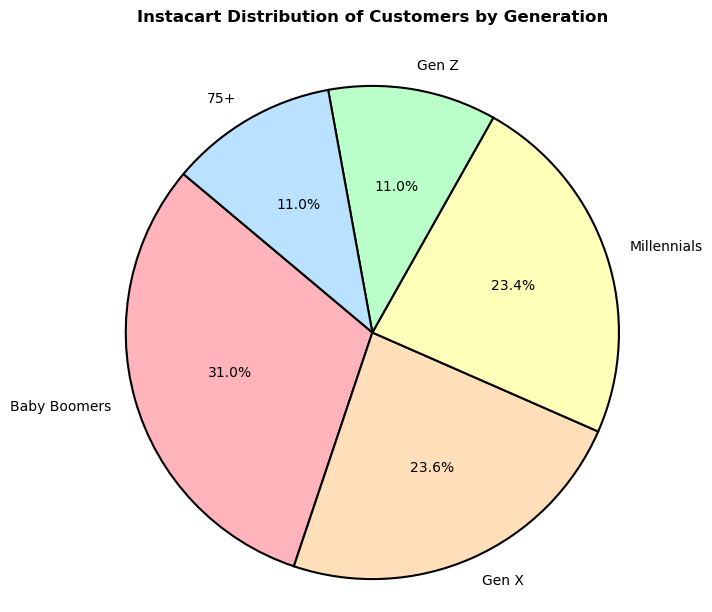

In [101]:
# Define colors
pastel_colors = ['#ffb3ba', '#ffdfba', '#ffffba', '#baffc9', '#bae1ff', '#cba6f7']

# Plot the pie chart
plt.figure(figsize=(7, 7))
wedges, texts, autotexts = plt.pie(
    generation_counts, 
    labels=generation_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=pastel_colors, 
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}
)
plt.title('Instacart Distribution of Customers by Generation', pad=30, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular

#Save the plot
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10', 'distribution_of_customers_by_generation.png'), bbox_inches = 'tight')

# Show the plot
plt.show()

## Step 6.2. Income distributions


In [102]:
# Count the occurrences of each income group
income_counts = user_sample['income_group'].value_counts()

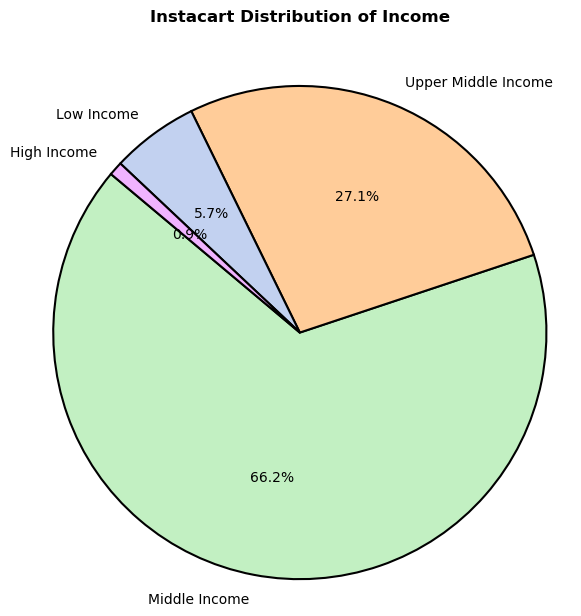

In [103]:
#Define colors
pastel_colors2 = ['#c2f0c2', '#ffcc99', '#c2d1f0', '#f0b3ff']

# Plot the pie chart
plt.figure(figsize=(7, 7))
wedges, texts, autotexts = plt.pie(
    income_counts, 
    labels=income_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=pastel_colors2, 
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}
)
plt.title('Instacart Distribution of Income', pad=30, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular

#Save the plot
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10', 'distribution_of_customers_by_income.png'), bbox_inches = 'tight')

# Show the plot
plt.show()

## Step 6.3. Category distributions

In [104]:
# Count the occurrences of each category
category_counts = user_sample['category'].value_counts()

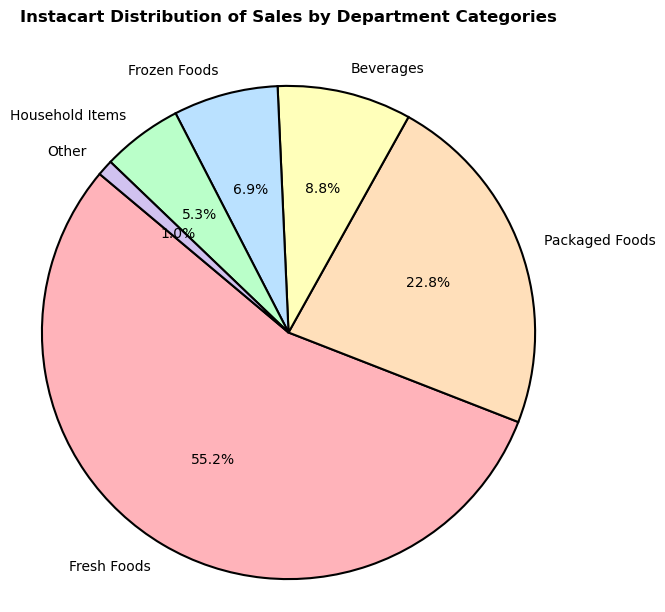

In [105]:
#Define colors
pastel_colors3 = ['#ffb3ba', '#ffdfba', '#ffffba', '#bae1ff', '#baffc9', '#d1c2f0', '#ffb3e6']


# Plot the pie chart
plt.figure(figsize=(7, 7))
wedges, texts, autotexts = plt.pie(
    category_counts, 
    labels=category_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=pastel_colors3, 
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}
)
plt.title('Instacart Distribution of Sales by Department Categories', pad=30, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular

#Save the plot
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10', 'distribution_of_sales_by_category.png'), bbox_inches = 'tight')

# Show the plot
plt.show()

## Step 6.4. Dependant status distribution


In [106]:
# Count the occurrences of each category
dependants_counts = user_sample['dependants_flag'].value_counts()

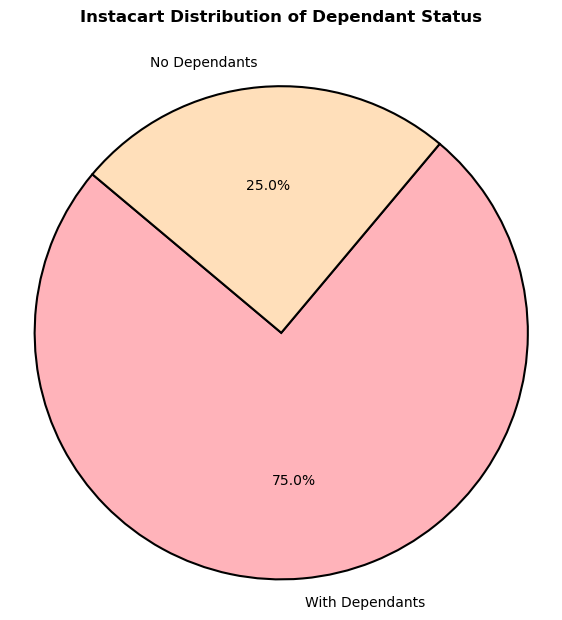

In [107]:
#Define colors
pastel_colors4 = ['#aec6cf', '#ffb3ba']

# Plot the pie chart
plt.figure(figsize=(7, 7))
wedges, texts, autotexts = plt.pie(
    dependants_counts, 
    labels=dependants_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=pastel_colors3, 
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}
)
plt.title('Instacart Distribution of Dependant Status', pad=30, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular

#Save the plot
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10', 'distribution_of_customers_by_dependant_status.png'), bbox_inches = 'tight')

# Show the plot
plt.show()

# Step 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

Usage frequency is analyzed based on 'days_since_prior_order' and expenditure is analyzed based on 'prices'.

In [108]:
# Create aggregated subset of data where the 'prices' column is the total cost of each order:
orders_subset = orders_products_department.groupby(['user_id', 'generation', 'income_group', 'dependants_flag', 'loyalty_flag', 'region', 'order_number', 'days_since_prior_order'])['prices'].sum().reset_index()

In [109]:
# Rename 'prices' to 'order_total'
orders_subset.rename(columns = {'prices' : 'order_total'}, inplace = True)

#Check the subset
orders_subset

,user_id,generation,income_group,dependants_flag,loyalty_flag,region,order_number,days_since_prior_order,order_total
0,1,Millennials,Low Income,With Dependants,New customer,South,1,7.0,31.6
1,1,Millennials,Low Income,With Dependants,New customer,South,2,15.0,35.4
2,1,Millennials,Low Income,With Dependants,New customer,South,3,21.0,28.2
3,1,Millennials,Low Income,With Dependants,New customer,South,4,29.0,26.0
4,1,Millennials,Low Income,With Dependants,New customer,South,5,28.0,57.0
...,...,...,...,...,...,...,...,...,...
3064370,206209,Baby Boomers,Upper Middle Income,With Dependants,Regular customer,Midwest,9,22.0,26.2
3064371,206209,Baby Boomers,Upper Middle Income,With Dependants,Regular customer,Midwest,10,29.0,64.7
3064372,206209,Baby Boomers,Upper Middle Income,With Dependants,Regular customer,Midwest,11,30.0,56.1
3064373,206209,Baby Boomers,Upper Middle Income,With Dependants,Regular customer,Midwest,12,18.0,131.5


## Step 7.1 Aggregating by generations

In [144]:
# max, min, mean by generation category
aggregations_by_gen = orders_subset.groupby('generation').agg({'days_since_prior_order' : ['min', 'mean', 'max'], 
                                                                  'order_total' : ['min', 'mean', 'max']})

# Reorder the index to ensure the desired order
ordered_generations = ['75+', 'Baby Boomers', 'Gen X', 'Millennials', 'Gen Z']
aggregations_by_gen = aggregations_by_gen.reindex(ordered_generations)

# Check the aggregation
aggregations_by_gen

/var/folders/3_/dyc73j694fb41h6xln2l5_rc0000gn/T/ipykernel_87218/2900061830.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregations_by_gen = orders_subset.groupby('generation').agg({'days_since_prior_order' : ['min', 'mean', 'max'],


days_since_prior_order                  order_total              \
                                min       mean   max         min        mean   
generation                                                                     
75+                             0.0  10.193719  30.0         1.0  123.237841   
Baby Boomers                    0.0  10.207827  30.0         1.0  119.408699   
Gen X                           0.0  10.187542  30.0         1.0  118.054095   
Millennials                     0.0  10.243533  30.0         1.0  120.720236   
Gen Z                           0.0  10.173742  30.0         1.0  126.394342   

                        
                   max  
generation              
75+           100330.2  
Baby Boomers  100452.9  
Gen X         100442.8  
Millennials   100384.5  
Gen Z         100265.6

## Step 7.2 Aggregating by income

In [186]:
# max, min, mean by income group
aggregations_by_income = orders_subset.groupby('income_group').agg({'days_since_prior_order' : ['min', 'mean', 'max'], 
                                                                  'order_total' : ['min', 'mean', 'max']})
# Reorder the index 
ordered_income_groups = ['High Income', 'Upper Middle Income', 'Middle Income', 'Low Income']
aggregations_by_income = aggregations_by_income.reindex(ordered_income_groups)

# Define the file path for exporting the DataFrame to Excel
file_path = os.path.join(path, '04 Analysis', 'Visualizations', '4.10', 'aggregations_by_gen.xlsx')

# Export the aggregation to an Excel file
aggregations_by_gen.to_excel(file_path, index=True)

# Check the aggregation
aggregations_by_income

days_since_prior_order                  order_total  \
                                       min       mean   max         min   
income_group                                                              
High Income                            0.0   9.094227  30.0         1.0   
Upper Middle Income                    0.0  10.106153  30.0         1.0   
Middle Income                          0.0  10.170750  30.0         1.0   
Low Income                             0.0  10.969615  30.0         1.0   

                                            
                            mean       max  
income_group                                
High Income          2973.754628  100452.9  
Upper Middle Income   132.843068  100330.2  
Middle Income          89.114363  100384.5  
Low Income             49.434370     875.0

High income people have considerable higher order total compare to all the other groups, followed by upper middle income, middle income, and low income as expected. Order frequency is not considerably different between these groups although somewhat higher for the high income group.

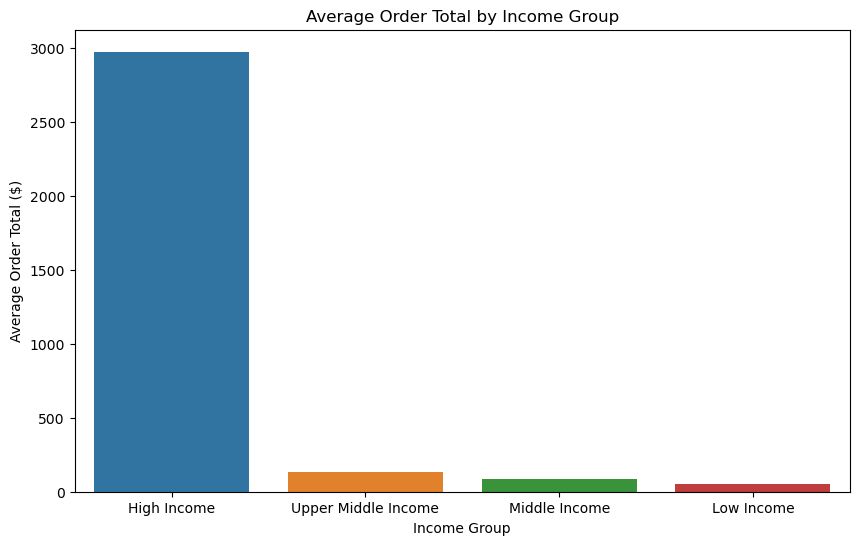

In [185]:
# Extract the mean order_total
mean_order_total = aggregations_by_income['order_total']['mean'].reset_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='income_group', y='mean', data=mean_order_total)

# Adding title and labels
plt.title('Average Order Total by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Average Order Total ($)')

# Display the plot
plt.show()

## Step 7.3 Aggregating by dependants flag

In [187]:
# max, min, mean by dependance flag
aggregations_by_dependants = orders_subset.groupby('dependants_flag').agg({'days_since_prior_order' : ['min', 'mean', 'max'], 
                                                                  'order_total' : ['min', 'mean', 'max']})

# Define the file path for exporting the DataFrame to Excel
file_path = os.path.join(path, '04 Analysis', 'Visualizations', '4.10', 'aggregations_by_dependants.xlsx')

# Export the aggregation to an Excel file
aggregations_by_dependants.to_excel(file_path, index=True)

# Check the aggregation
aggregations_by_dependants

days_since_prior_order                  order_total  \
                                   min       mean   max         min   
dependants_flag                                                       
No Dependants                      0.0  10.198976  30.0         1.0   
With Dependants                    0.0  10.208390  30.0         1.0   

                                       
                       mean       max  
dependants_flag                        
No Dependants    122.006145  100384.5  
With Dependants  120.109315  100452.9

# Step 8. Compare customer profiles with regions and departments.

## Step 8.1. Customer profiles in different regions

### Step 8.1.1 Profile by region and generation

In [113]:
# Order the categories for the generation column
generation_order = ['Gen Z', 'Millennials', 'Gen X', 'Baby Boomers', '75+']
orders_subset['generation'] = pd.Categorical(orders_subset['generation'], categories=generation_order, ordered=True)

# Create a crosstab of generation and region
crosstab_gen_region = pd.crosstab(orders_subset['region'], orders_subset['generation'])
print(crosstab_gen_region)

generation   Gen Z  Millennials   Gen X  Baby Boomers     75+
region                                                       
Midwest      78136       165361  175179        221991   78625
Northeast    59110       126156  126725        168003   60205
South       114454       238884  237318        316000  114723
West         84557       182603  185741        244346   86258


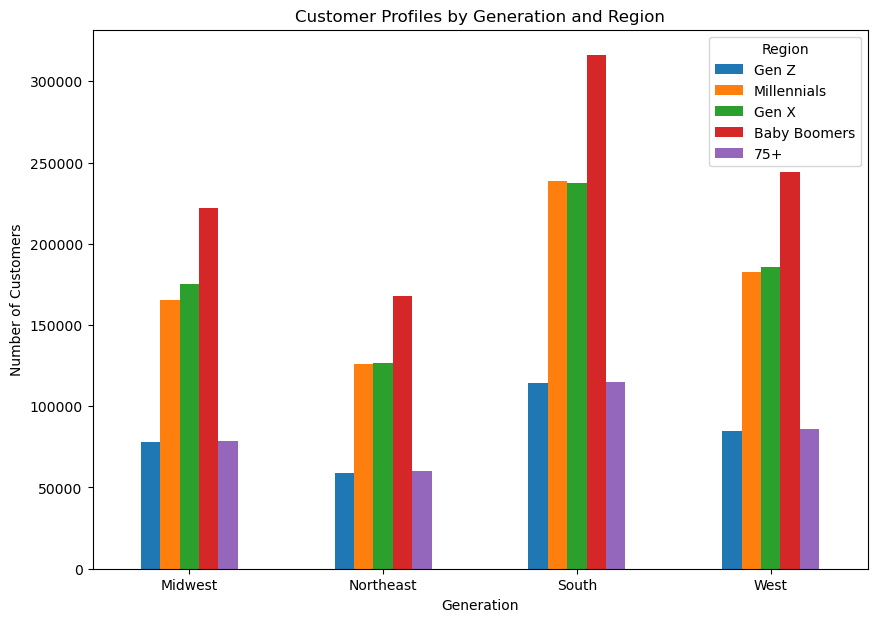

In [114]:
# Plotting the bar chart
crosstab_gen_region.plot(kind='bar', figsize=(10, 7))

# Adding title and labels
plt.title('Customer Profiles by Generation and Region')
plt.xlabel('Generation')
plt.ylabel('Number of Customers')
plt.legend(title='Region')
plt.xticks(rotation=0)


#Save the plot
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10', 'customer_profiles_by_generation_and_region.png'), bbox_inches = 'tight')

plt.show()

Generation-wise, customers follow a very similar pattern across all regions however, numbers are much higher in the South.

### Step 8.1.2. Profile by region and income

In [115]:
# Create a crosstab of income group and region
crosstab_income_region = pd.crosstab(orders_subset['region'], orders_subset['income_group'])
print(crosstab_income_region)

income_group  High Income  Low Income  Middle Income  Upper Middle Income
region                                                                   
Midwest              5842       53976         468420               191054
Northeast            3900       41761         353120               141418
South                8451       79121         670583               263224
West                 6333       58122         515902               203148


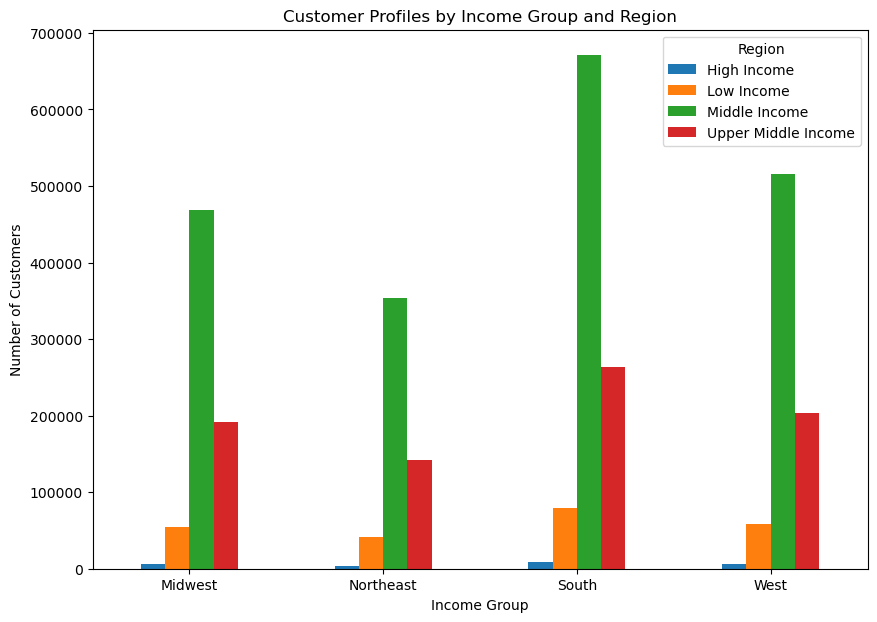

In [116]:
# Plotting the bar chart
crosstab_income_region.plot(kind='bar', figsize=(10, 7))

# Adding title and labels
plt.title('Customer Profiles by Income Group and Region')
plt.xlabel('Income Group')
plt.ylabel('Number of Customers')
plt.legend(title='Region')
plt.xticks(rotation=0)

#Save the plot
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10', 'customer_profiles_by_income_and_region.png'), bbox_inches = 'tight')

plt.show()

The majority of the people in all regions are in the middle income group. Again, the size of the groups are proportioned to the customer number in all the regions. However, South seems to hae a much higher middle income group than the others compared to the other income groups, which are somewhat closer in size in all the regions.

### Step 8.1.3. Profile by region and dependant status

In [117]:
# Create a crosstab of dependant group and region
crosstab_dependant_region = pd.crosstab(orders_subset['region'], orders_subset['dependants_flag'])
print(crosstab_dependant_region)

dependants_flag  No Dependants  With Dependants
region                                         
Midwest                 180558           538734
Northeast               136070           404129
South                   255239           766140
West                    195887           587618


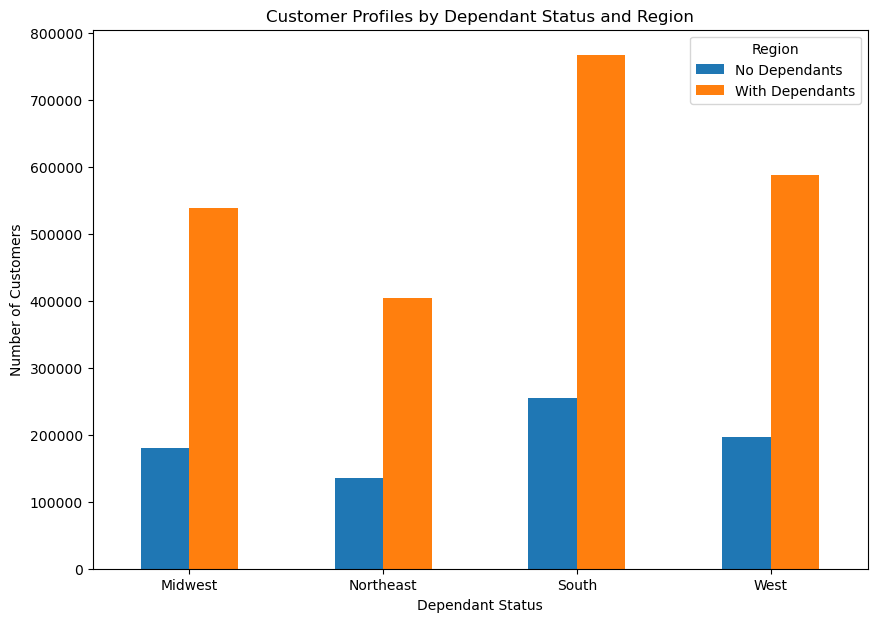

In [118]:
# Plotting the bar chart
crosstab_dependant_region.plot(kind='bar', figsize=(10, 7))

# Adding title and labels
plt.title('Customer Profiles by Dependant Status and Region')
plt.xlabel('Dependant Status')
plt.ylabel('Number of Customers')
plt.legend(title='Region')
plt.xticks(rotation=0)
#Save the plot
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10', 'customer_profiles_by_dependant_status_and_region.png'), bbox_inches = 'tight')


plt.show()

It is obvious that the majority of Instacart costumers have dependants. Especially in the South, the number is much higher.

## Step 8.2. Customer profiles by department sales

### Step 8.2.1 Department sales and generation

In [119]:
# Order the categories for the generation column
generation_order = ['Gen Z', 'Millennials', 'Gen X', 'Baby Boomers', '75+']
user_sample['generation'] = pd.Categorical(user_sample['generation'], categories=generation_order, ordered=True)

# Create a crosstab of generation and department category 
crosstab_gen_category = pd.crosstab(user_sample['category'], user_sample['generation'])
print(crosstab_gen_category)

/var/folders/3_/dyc73j694fb41h6xln2l5_rc0000gn/T/ipykernel_87218/3435111769.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_sample['generation'] = pd.Categorical(user_sample['generation'], categories=generation_order, ordered=True)


generation         Gen Z  Millennials    Gen X  Baby Boomers      75+
category                                                             
Beverages         296733       629096   643276        847268   300155
Fresh Foods      1881271      4003231  4013004       5281257  1877135
Frozen Foods      234088       492715   500859        657543   236526
Household Items   180682       376604   389830        501748   178751
Other              36300        76288    76872         98683    35710
Packaged Foods    778681      1656922  1661888       2179378   777302


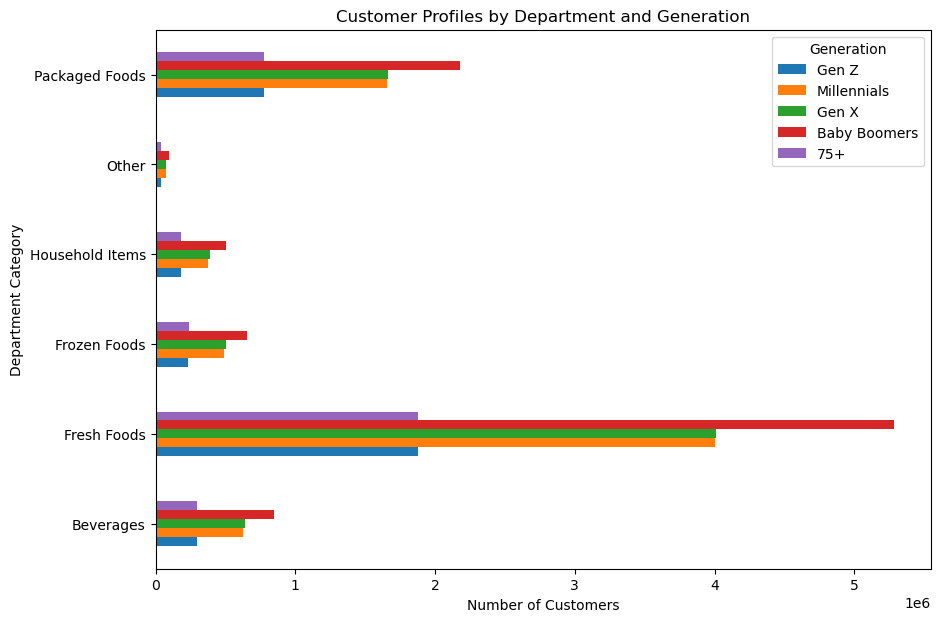

In [120]:
# Plotting the bar chart
crosstab_gen_category.plot(kind='barh', figsize=(10, 7))

# Adding title and labels
plt.title('Customer Profiles by Department and Generation')
plt.xlabel('Number of Customers')
plt.ylabel('Department Category')
plt.legend(title='Generation')
plt.xticks(rotation=0)

#Save the plot
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10', 'customer_profiles_by_department_and_generation.png'), bbox_inches = 'tight')

plt.show()

### Step 8.2.2 Department sales and income


In [121]:
# Create a crosstab of generation and department category 
crosstab_income_category = pd.crosstab(user_sample['category'], user_sample['income_group'])
print(crosstab_income_category)

income_group     High Income  Low Income  Middle Income  Upper Middle Income
category                                                                    
Beverages              34073      219752        1759794               702909
Fresh Foods           133379      802831       11392116              4727572
Frozen Foods           22293      113306        1401261               584871
Household Items        21329       90950        1071445               443891
Other                   2798       15626         216679                88750
Packaged Foods         68180      525442        4620180              1840369


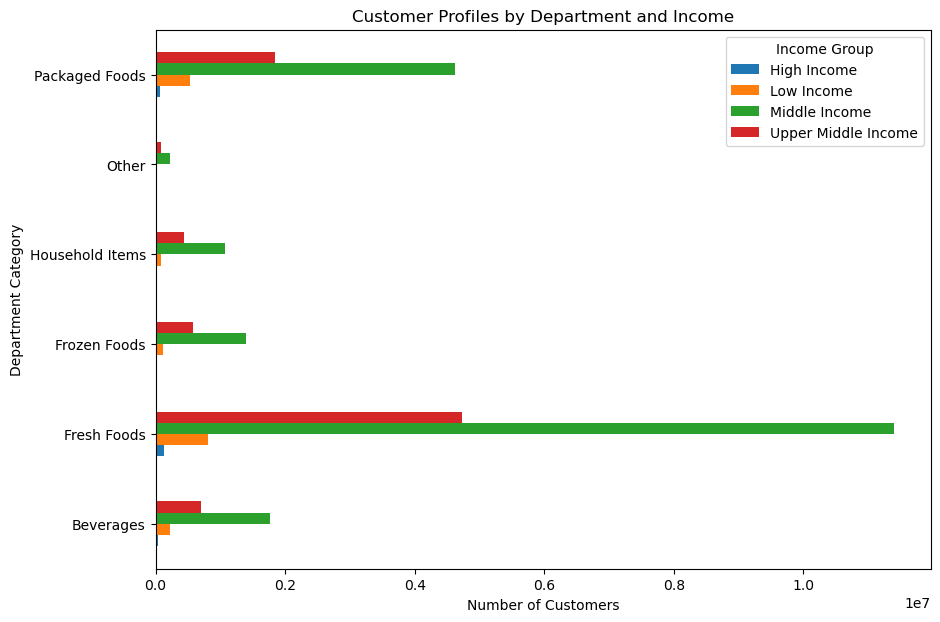

In [122]:
# Plotting the bar chart
crosstab_income_category.plot(kind='barh', figsize=(10, 7))

# Adding title and labels
plt.title('Customer Profiles by Department and Income')
plt.xlabel('Number of Customers')
plt.ylabel('Department Category')
plt.legend(title='Income Group')
plt.xticks(rotation=0)

#Save the plot
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10', 'customer_profiles_by_department_and_income.png'), bbox_inches = 'tight')

plt.show()

The most popular department category is Fresh Foods, followed by packaged foods for all he income groups.

### ### Step 8.2.3 Department sales and dependant status


In [123]:
# Create a crosstab of dependant status and department category 
crosstab_dep_category = pd.crosstab(user_sample['category'], user_sample['dependants_flag'])
print(crosstab_dep_category)

dependants_flag  No Dependants  With Dependants
category                                       
Beverages               682168          2034360
Fresh Foods            4270472         12785426
Frozen Foods            529348          1592383
Household Items         404493          1223122
Other                    81175           242678
Packaged Foods         1756090          5298081


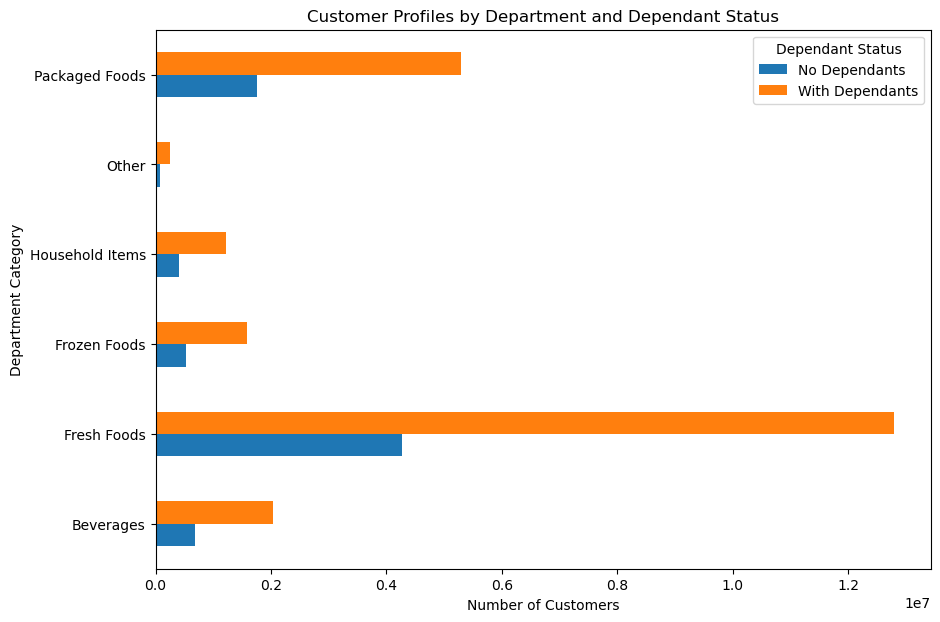

In [124]:
# Plotting the bar chart
crosstab_dep_category.plot(kind='barh', figsize=(10, 7))

# Adding title and labels
plt.title('Customer Profiles by Department and Dependant Status')
plt.xlabel('Number of Customers')
plt.ylabel('Department Category')
plt.legend(title='Dependant Status')
plt.xticks(rotation=0)

#Save the plot
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10', 'customer_profiles_by_department_and_dependant_status.png'), bbox_inches = 'tight')

plt.show()

The presence of dependents does not significantly impact sales across different departments. In all departments, customers with dependents tend to shop at a rate slightly more than double that of customers without dependents.

# Exporting data

In [125]:
orders_products_department.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_LAST.pkl'))

In [126]:
user_sample.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'user_sample_LAST.pkl'))

# Importing again for the supplemantary analysis

In [127]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [128]:
path = r'/Users/buketoztekin/Documents/Instacart Basket Analysis/'
file_path = os.path.join(path, '02 Data', 'Prepared Data', 'user_sample_LAST.pkl')
user_sample_LAST = pd.read_pickle(file_path)

In [129]:
user_sample_LAST.head()

,user_id,generation,income_group,department,category,dependants_flag,region,loyalty_flag,spender_flag
0,26711,Gen X,Upper Middle Income,beverages,Beverages,With Dependants,Midwest,New customer,Low spender
1,26711,Gen X,Upper Middle Income,beverages,Beverages,With Dependants,Midwest,New customer,Low spender
2,26711,Gen X,Upper Middle Income,beverages,Beverages,With Dependants,Midwest,New customer,Low spender
3,26711,Gen X,Upper Middle Income,produce,Fresh Foods,With Dependants,Midwest,New customer,Low spender
4,26711,Gen X,Upper Middle Income,produce,Fresh Foods,With Dependants,Midwest,New customer,Low spender


In [130]:
file_path = os.path.join(path, '02 Data', 'Prepared Data', 'instacart_LAST.pkl')
instacart_LAST = pd.read_pickle(file_path)

In [131]:
print(instacart_LAST.columns)

Index(['user_id', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependants', 'family_status', 'income', 'product_id',
       'product_name', 'aisle_id', 'department_id', 'prices', 'order_id',
       'order_number', 'order_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered', '_merge',
       'merge_indicator', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_spending', 'spender_flag', 'purchase_frequency',
       'frequency_flag', 'region', 'exclusion_flag', 'generation',
       'income_group', 'department', 'category', 'dependants_flag'],
      dtype='object')


## 11. Supplementary analysis

### Are there certain products that are more popular than the others?

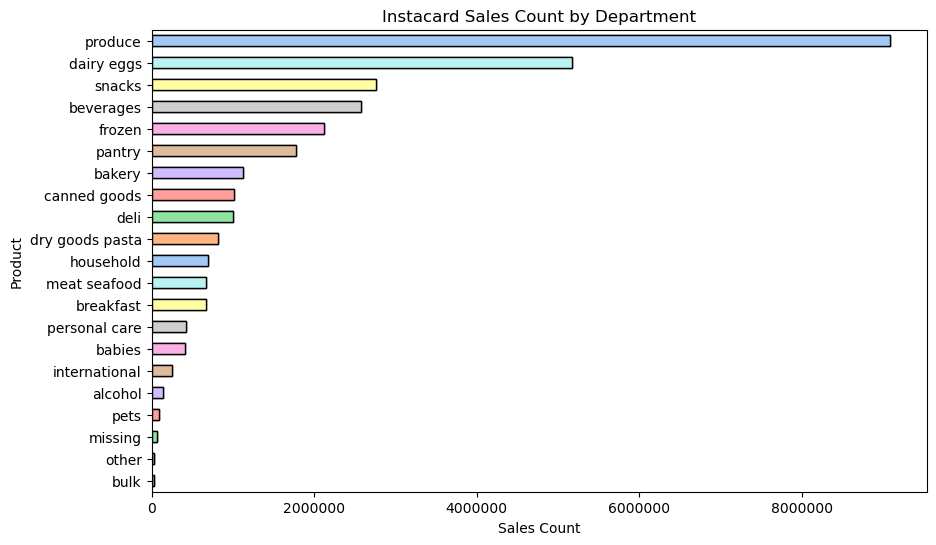

In [132]:
# Aggregate the data by department and count the occurrences
department_counts = user_sample_LAST['department'].value_counts().sort_values(ascending=True)

# Define colors
pastel_colors = sns.color_palette("pastel")

# Plotting the chart
plt.figure(figsize=(10, 6))
department_counts.plot(kind='barh', color=pastel_colors, edgecolor = 'black')
ax = department_counts.plot(kind='barh', color=pastel_colors, edgecolor='black')


# Adding title and labels
plt.title('Instacard Sales Count by Department')
plt.xlabel('Sales Count')
plt.ylabel('Product')
plt.xticks(rotation=0)

# Define a function to format the x-axis tick labels
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.0f' % (x)

# Apply the formatter to the x-axis
ax.xaxis.set_major_formatter(FuncFormatter(millions))

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10', 'sales_count_by_department.png'), bbox_inches = 'tight')



# Display the plot
plt.show()

### Are there differences in ordering habits based on a customers' loyalty status?

In [169]:
# Group the data by 'loyalty_flag' and calculate the mean of 'prices' for each group
product_avg_cost = instacart_LAST.groupby('loyalty_flag')['prices'].mean().sort_values(ascending = False).reset_index()

In [134]:
#Check the table
product_avg_cost

,loyalty_flag,prices
0,New customer,13.387725
1,Regular customer,12.495717
2,Loyal customer,10.386336


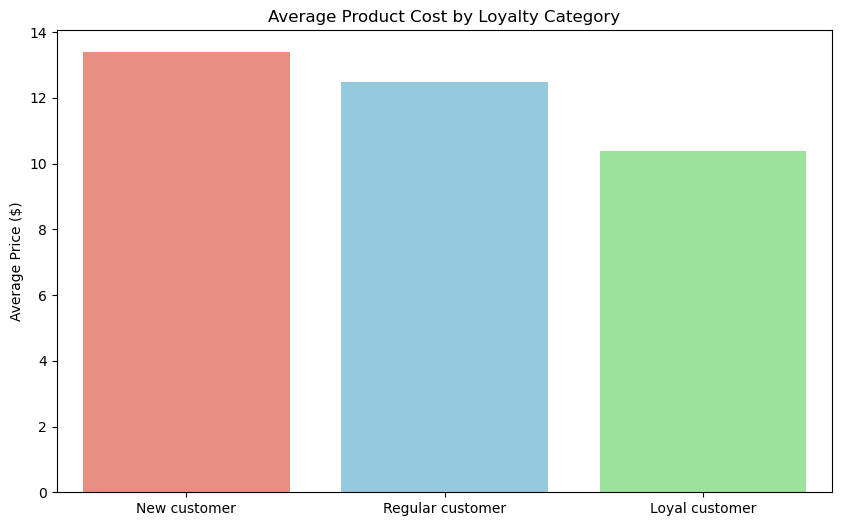

In [166]:
#Assign colors to each bar
colors = ['salmon', 'skyblue', 'lightgreen']

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='loyalty_flag', y='prices', data=product_avg_cost, palette=colors)

# Adding title and labels
plt.title('Average Product Cost by Loyalty Category')
plt.xlabel('')
plt.ylabel('Average Price ($)')

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10', 'average_product_cost_by_loyakty_category.png'), bbox_inches = 'tight')


# Display the plot
plt.show()

In [168]:
# Group the data by 'loyalty_flag' and calculate the sumof 'prices' for each group
product_total_cost = instacart_LAST.groupby('loyalty_flag')['prices'].sum().sort_values(ascending = False).reset_index()

In [170]:
#Check the table
product_total_cost

,loyalty_flag,prices
0,Regular customer,198391693.2
1,Loyal customer,106814042.2
2,New customer,64310546.2


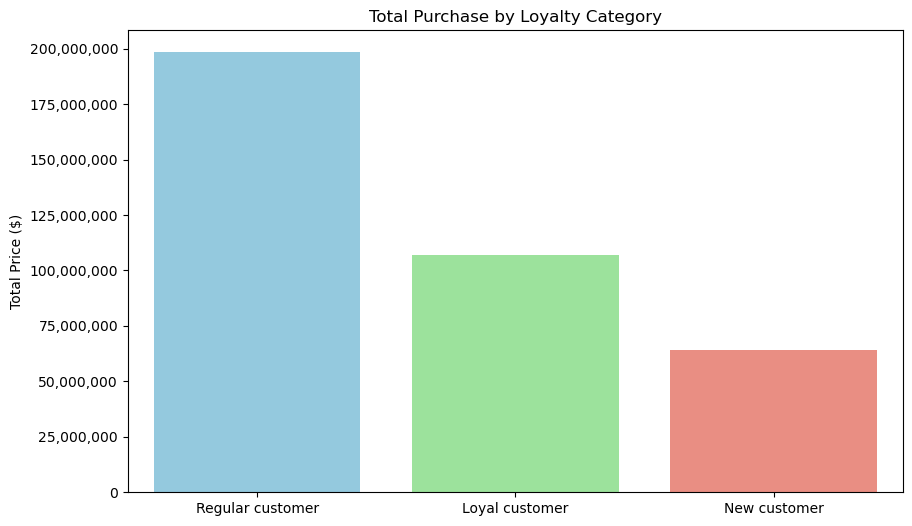

In [175]:
#Assign colors to each bar
colors = ['skyblue', 'lightgreen', 'salmon']

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='loyalty_flag', y='prices', data=product_total_cost, palette=colors)

# Adding title and labels
plt.title('Total Purchase by Loyalty Category')
plt.xlabel('')
plt.ylabel('Total Price ($)')

# Define a function to format the y-axis tick labels
def format_thousands(x, pos):
    return f'{int(x):,}'

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_thousands))


#Save the plot
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10', 'total_purchase_cost_by_loyalty_category.png'), bbox_inches = 'tight')


# Display the plot
plt.show()

### Are there differences in ordering habits based on a customer's region?

In [136]:
# Group the data by 'region' and calculate the mean of 'prices' for each group
product_avg_cost_2 = instacart_LAST.groupby('region')['prices'].mean().sort_values(ascending = False).reset_index()

In [137]:
#Check the table
product_avg_cost_2

,region,prices
0,Midwest,12.681835
1,South,12.118845
2,Northeast,11.542582
3,West,11.276491


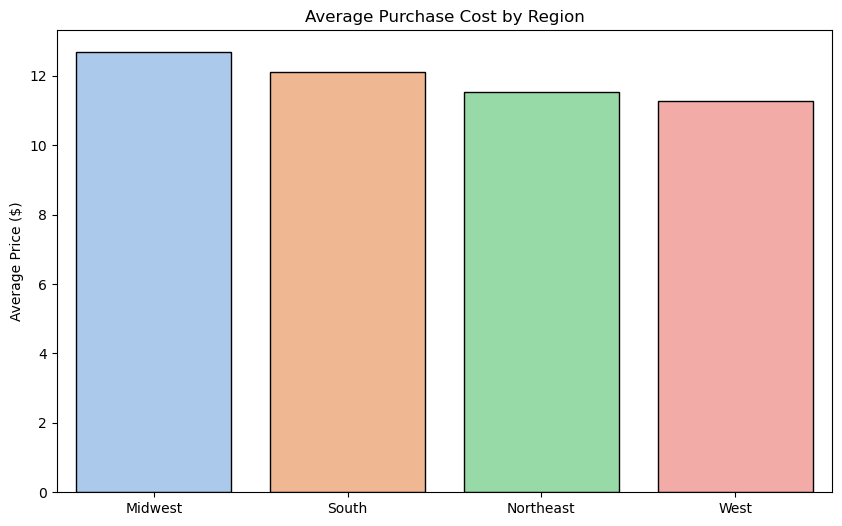

In [183]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='prices', data=product_avg_cost_2, palette=pastel_colors, edgecolor='black')

# Adding title and labels
plt.title('Average Purchase Cost by Region')
plt.xlabel('')
plt.ylabel('Average Price ($)')

#Save the chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10', 'average_purchase_cost_by_region.png'), bbox_inches = 'tight')


# Display the plot
plt.show()

In [176]:
# Group the data by 'region' and calculate the sum of 'prices' for each group
product_total_cost = instacart_LAST.groupby('region')['prices'].sum().sort_values(ascending = False).reset_index()

In [177]:
#Check the table
product_total_cost

,region,prices
0,South,124959094.2
1,Midwest,92089307.8
2,West,89391305.9
3,Northeast,63076573.7


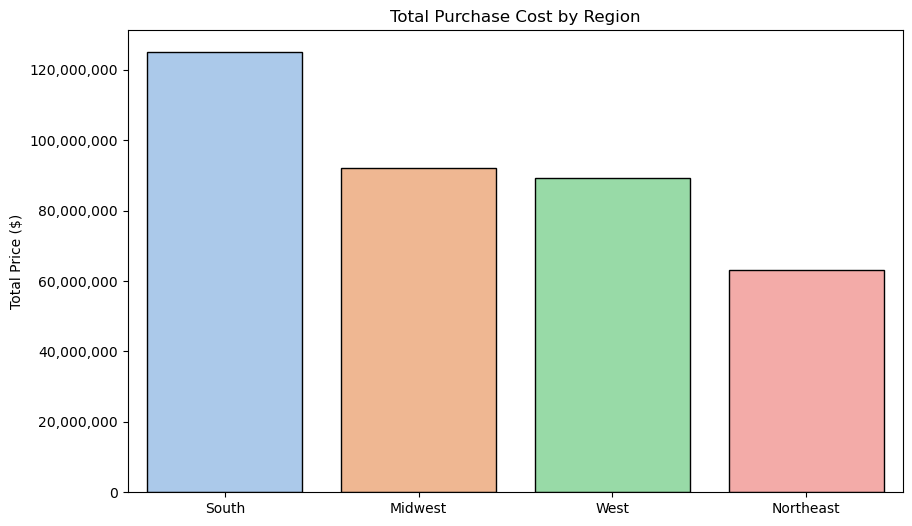

In [182]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='prices', data=product_total_cost, palette=pastel_colors, edgecolor='black')

# Adding title and labels
plt.title('Total Purchase Cost by Region')
plt.xlabel('')
plt.ylabel('Total Price ($)')

# Define a function to format the y-axis tick labels
def format_thousands(x, pos):
    return f'{int(x):,}'

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_thousands))

#Save the plot
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10', 'total_purchase_cost_by_region.png'), bbox_inches = 'tight')


# Display the plot
plt.show()

### What differences can you find in ordering habits of different customer profiles?

In [139]:
# Create a crosstab of generation and income
crosstab_generation_income = pd.crosstab(user_sample_LAST['income_group'], user_sample_LAST['generation'])
print(crosstab_generation_income)

generation             Gen Z  Millennials    Gen X  Baby Boomers      75+
income_group                                                             
High Income            17440        34015    86645        102088    42243
Low Income            260545       555154   354683        444893   156008
Middle Income        3112545      6609314  3975729       5024693  1782330
Upper Middle Income    24664        51433  2884366       4013728  1432048


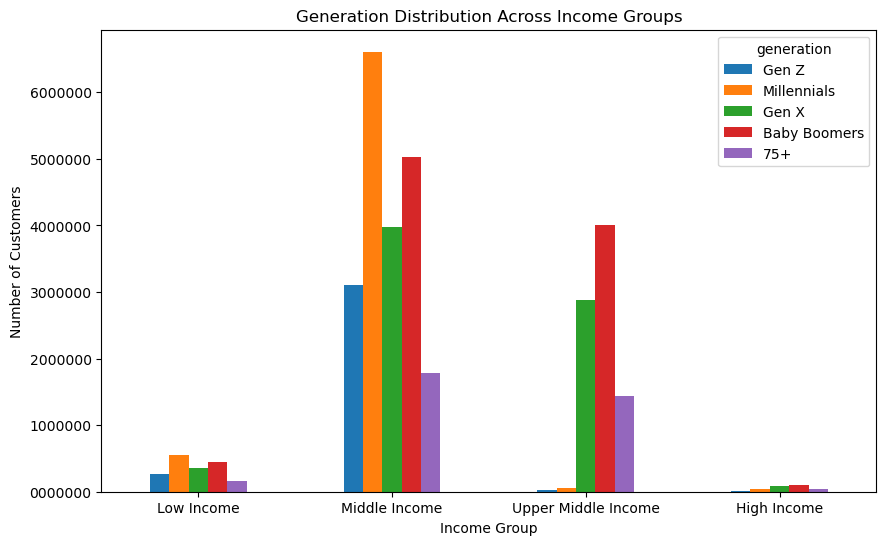

In [140]:
# Reorder the index 
ordered_income_groups = ['Low Income', 'Middle Income', 'Upper Middle Income', 'High Income']
crosstab_generation_income = crosstab_generation_income.reindex(ordered_income_groups)

# Plotting the bar chart
ax = crosstab_generation_income.plot(kind='bar', figsize=(10, 6))

# Adding title and labels
plt.title('Generation Distribution Across Income Groups')
plt.xlabel('Income Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)

# Define a function to format the y-axis tick labels
def format_thousands(x, pos):
    return f'{int(x/1e6)}000000'

# Apply the formatter to the y-axis
ax.yaxis.set_major_formatter(FuncFormatter(format_thousands))

#Save the plot
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10', 'generation_distribution_across_income_groups.png'), bbox_inches = 'tight')

# Display the plot
plt.show()

In [147]:
# Create a crosstab of frequency and income
crosstab_frequency_income = pd.crosstab(instacart_LAST['income_group'], instacart_LAST['frequency_flag'])
print(crosstab_frequency_income)

frequency_flag       Frequent customer  Non-frequent customer  \
income_group                                                    
High Income                     212351                  13306   
Low Income                     1199165                 160883   
Middle Income                 14733282                1437679   
Upper Middle Income            6062094                 575549   

frequency_flag       Regular customer  
income_group                           
High Income                     56774  
Low Income                     411235  
Middle Income                 4333650  
Upper Middle Income           1768596  


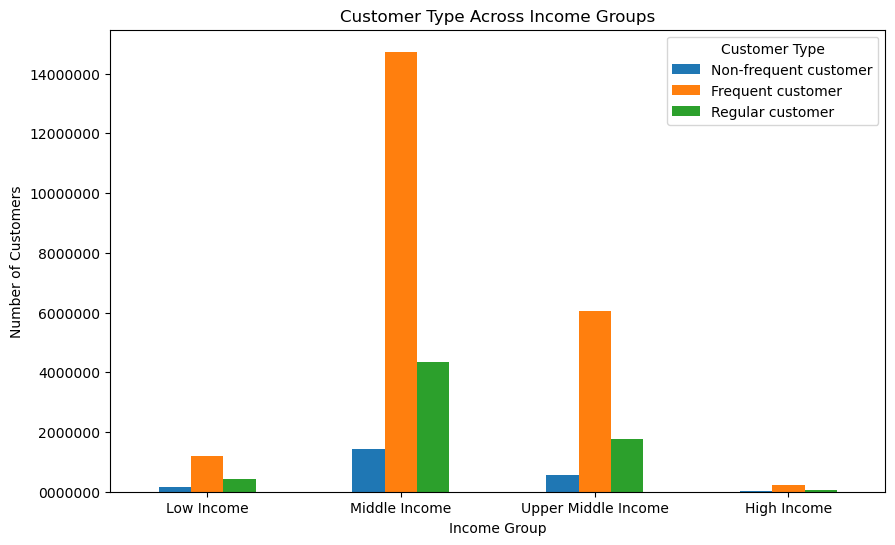

In [164]:
# Reorder the index
ordered_income_groups = ['Low Income', 'Middle Income', 'Upper Middle Income', 'High Income']
crosstab_frequency_income = crosstab_frequency_income.reindex(ordered_income_groups)

# Reorder the columns
ordered_columns = ['Non-frequent customer', 'Frequent customer', 'Regular customer']
crosstab_frequency_income = crosstab_frequency_income[ordered_columns]

# Plotting the bar chart
ax = crosstab_frequency_income.plot(kind='bar', figsize=(10, 6))


# Apply the formatter to the y-axis
ax.yaxis.set_major_formatter(FuncFormatter(format_thousands))

# Adding title and labels
plt.title('Customer Type Across Income Groups')
plt.xlabel('Income Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)

# Rename the legend
plt.legend(title='Customer Type')

#Save the plot
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10', 'customer_type_across_income_groups.png'), bbox_inches = 'tight')


# Display the plot
plt.show()